# Presentation for the L-Band Working Group at Western Snow's 2022 Conference

## Installation

In [ ]:
# pip install uavsar_pytools

## Creating a Netrc file. 

End user agreement.

In [ ]:
#from uavsar_pytools.uavsar_tools import create_netrc
#create_netrc()

## Basic Usage: You have a url and want to download, unzip, and convert to geotiffs.

In [1]:
from uavsar_pytools.UavsarScene import UavsarScene
directory_to_load = '/Users/jacktarricone/Desktop/snowex_talk/'
url = 'https://datapool.asf.alaska.edu/INTERFEROMETRY_GRD/UA/ylwstn_26902_09053-000_14110-001_1838d_s01_L090_01_int_grd.zip'
scene = UavsarScene(url = url, work_dir = directory_to_load)
scene.url_to_tiffs()

Unzipping: 100%|████████████████████████████████| 5/5 [00:14<00:00,  2.90s/file]


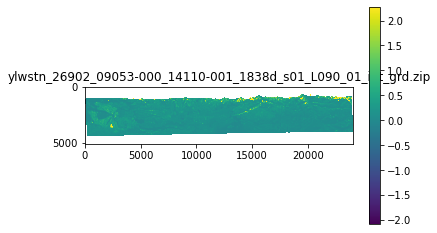

In [2]:
scene.show(2)

In [ ]:
import pandas as pd
df = pd.DataFrame(scene.images[0]['description'])
df.to_csv('/Users/jacktarricone/Desktop/snowex_talk/good_tiffs/ylwstn_26902_09053-000_14110-001_1838d_s01_L090HH_01.ann')

In [ ]:
df

In [ ]:
print(scene.images[0]['description']['start time of acquisition for pass 1']['value'])
print(scene.images[0]['description']['start time of acquisition for pass 2']['value'])

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(scene.images[0]['array'].astype(float))

## You have a single image (usually an incidence angle file and want to convert)

In [ ]:
from uavsar_pytools.UavsarImage import UavsarImage
inc_url = 'http://uavsar.asfdaac.alaska.edu/UA_lowman_23205_21021_006_210322_L090_CX_01/lowman_23205_21021_006_210322_L090_CX_01.inc'
directory_to_load = '/Users/jacktarricone/Desktop/snowex_talk/'
img = UavsarImage(url = inc_url, work_dir = directory_to_load)
img.url_to_tiff()

In [ ]:
img.show()

## You want to define and search programmatically

# ASF Search Parameters

from: https://docs.asf.alaska.edu/api/keywords/
                     
                     platform = 'UAVSAR',
                     processingLevel = (['INTERFEROMETRY_GRD']),
                     intersectsWith = wkt,
                     collectionName = 'lowman'
                     start = start_date,
                     end = end_date)

In [3]:
# search for data
import asf_search as asf
results = asf.search(platform = 'UAVSAR',
                     processingLevel = (['INTERFEROMETRY_GRD']),
                     collectionName = 'Peeler Peak, CO')

print(f'{len(results)} product(s) found')

4 product(s) found


In [ ]:
# show map
from folium import Map
from folium.plugins import Draw
m = Map()
draw = Draw(export = True, filename = 'asf_wkt.geojson')
draw.add_to(m)
m

In [ ]:
import geopandas as gpd
#wkt = 'POLYGON((-135.6 58.2, -136.6 58.1, -135.8 56.9, -134.6 56.9, -134.9 58.0, -135.7 58.2))'
wkt = gpd.read_file('~/Downloads/asf_wkt (16).geojson').to_wkt().loc[0, 'geometry']
print(wkt)

In [ ]:
from datetime import datetime
# define search parameters for sierra flight line
start_date = datetime.strptime('2020-02-20 11:00:00', '%Y-%m-%d %H:%M:%S') 
end_date = datetime.strptime('2021-02-21 11:00:00', '%Y-%m-%d %H:%M:%S') 

# search for data
results = asf.search(platform = 'UAVSAR',
                     processingLevel = (['INTERFEROMETRY_GRD']),
                     intersectsWith = wkt,
                     start = start_date,
                     end = end_date)

print(f'{len(results)} product(s) found')

# Search by Collection Name

https://api.daac.asf.alaska.edu/services/utils/mission_list

In [ ]:
# search for all lowman data
results = asf.search(platform = 'UAVSAR',
                     processingLevel = (['INTERFEROMETRY_GRD']),
                     collectionName = 'Lowman, CO')

print(f'{len(results)} product(s) found')

In [ ]:
# search for peeler data
results = asf.search(platform = 'UAVSAR',
                     processingLevel = (['INTERFEROMETRY_GRD']),
                     collectionName = 'Peeler Peak, CO')

print(f'{len(results)} product(s) found')

In [ ]:
# loop to download whole list
for i in range(len(results)):
    url = results[i].properties['url']
    scene = UavsarScene(url = url, work_dir= './data/imgs/')
    scene.url_to_tiffs()
    print(scene.images[0]['description']['start time of acquisition for pass 1']['value'])
    print(scene.images[0]['description']['start time of acquisition for pass 2']['value'])